<br><br>
<h1> <center style="color: red;"> Assignment 1: Introduction to Machine Learning </center> </h1>

<h2>Introduction</h2>
<br>

<p style="font-size:1.1em;">We are applying various Machine Learning algorithms to predict wheter a patient will be discharged from the hospital within 3 days or will stay at hospital for more than 4 days based on previous patient records. Let's start by importing the dataset and libraries to process them.
</p>

In [112]:
# standard import
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure

# object to int conversion
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# feature scaling
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

# for predictions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# generating report
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# for calculating score
from sklearn.metrics import f1_score

<center> <h2 style="color: green;"> <b> Data Retrieving </b> </h2> </center>

<br><br>
<p style="font-size:1.1em;"> Loading the data from both test_data.scv and train_data.csv and checking the data stored in them.</p>

In [59]:
# importing the train data csv file
train_data = pd.read_csv("../input/assignment-ml-temp/train_data.csv")
train_data.head(4)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1


In [60]:
# importing the test data csv file
test_data = pd.read_csv("../input/assignment-ml-temp/test_data.csv")
test_data.head(4)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,1,New York City,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,2,New York City,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,3,New York City,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,4,New York City,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45


<p style="font-size:1.1em;">Plotting pair plot and corelation matrix here to see any relationship between variables. After pre-processing step, attribute values will change and finding relationship will be difficult.

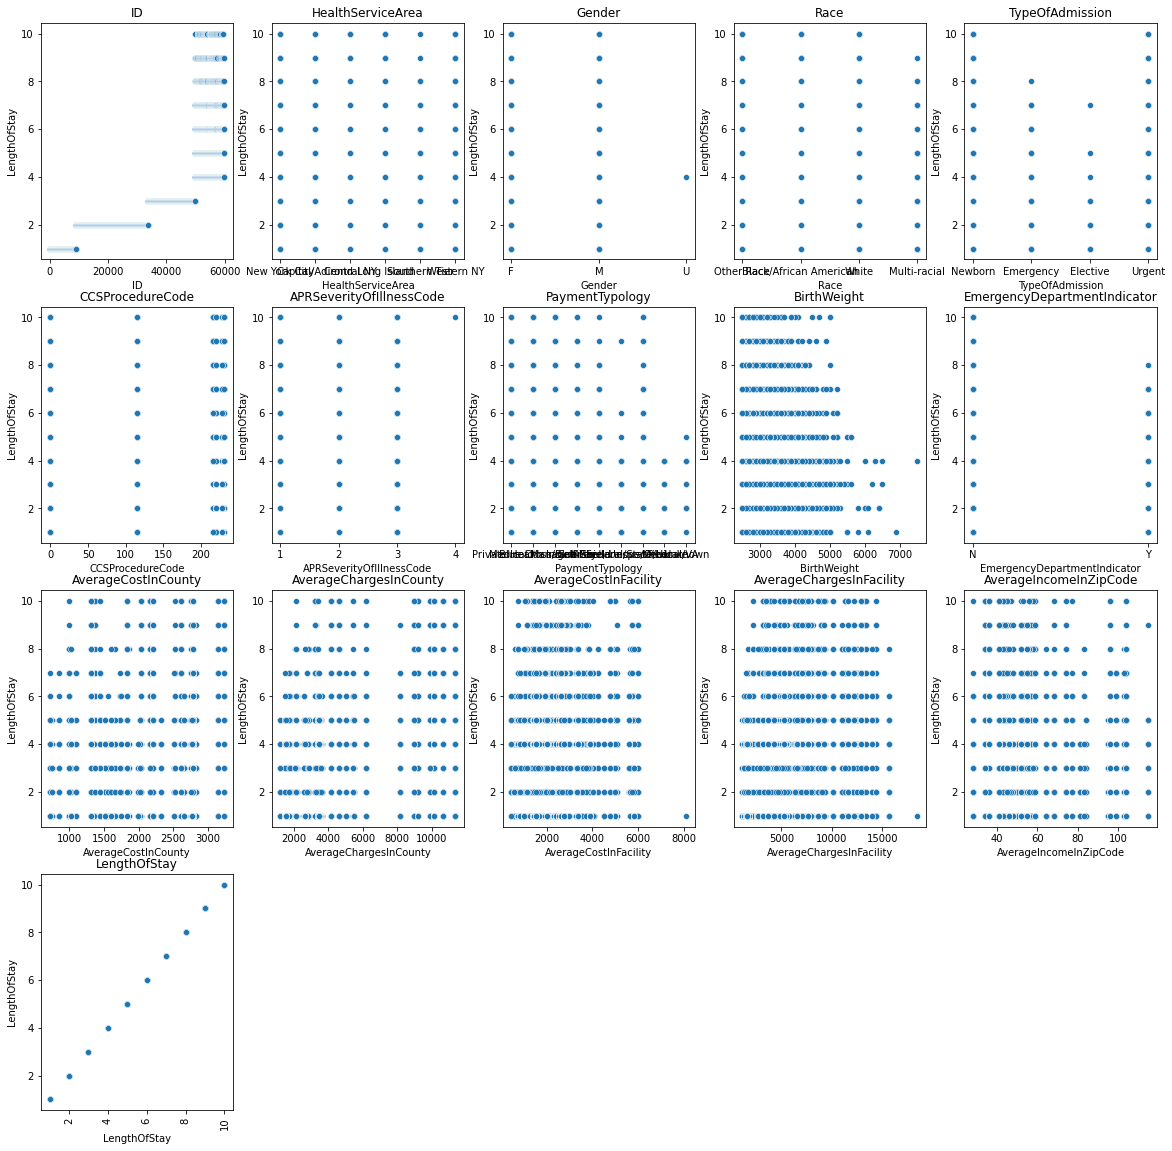

In [61]:
plt.figure(figsize=(20,20))
for i, col in enumerate(train_data.columns):
    plt.subplot(4,5,i+1)
    sns.scatterplot(data=train_data, x=col, y='LengthOfStay')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

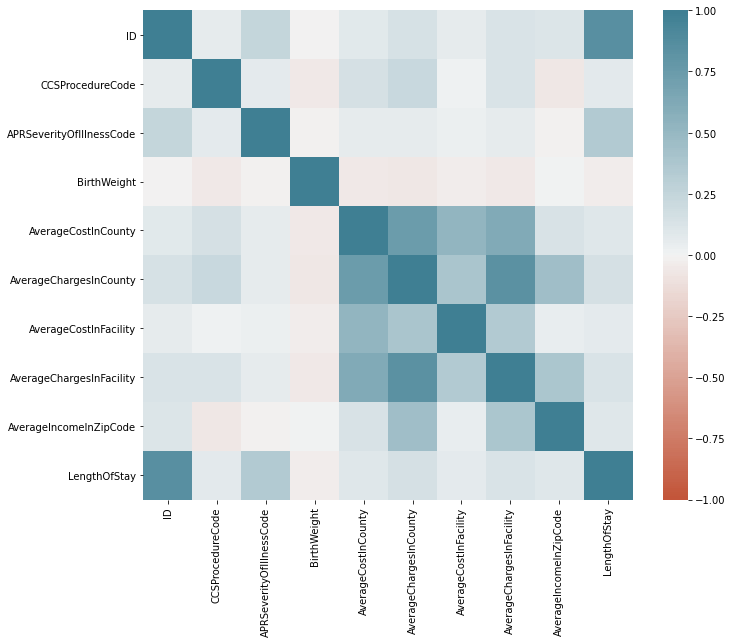

In [62]:
fig, axis = plt.subplots(figsize=(11, 9))
corr = train_data.corr()
axis = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show()

<p style ="font-size:1.1em;"> From the second plot, we can see that 'AverageCostInCounty', 'AverageChargesInCounty', 'AverageCostInFacility', 'AverageChargesInFacility' have positive relationship. These values increases and decreases in same direction.

<center> <h2 style="color: green;"> <b> Data Pre-processing </b> </h2> </center>

<br><br>
<p style="font-size:1.1em;"> 
    <b> For both test and train data, objectives:  </b>
    <ol> 
        <li style="font-size:1.1em;"> drop attributes 'ID' and 'HealthServiceArea' : as they are not necessary to predict LengthOfStay (according to assignment specifications). </li>
        <li style="font-size:1.1em;"> check for null values and remove it if exists </li>
        <li style="font-size:1.1em;"> converting LengthOfStay to 0 for values less than 3 and 1 for values greater than 4 </li>
        <li style="font-size:1.1em;"> check if both test and train have similar data distribution </li>
        <li style="font-size:1.1em;"> performing Label Encoding and One Hot Encoding for object type attributes </li>
        <li style="font-size:1.1em;"> standard scaling numeric attributes which are inconsistent </li>     
        <li style="font-size:1.1em;"> creating train. test and validation set from train_data </li>
   </ol>         
</p>

<p style="font-size:1.1em;"> <b>1</b>. droping attributes 'ID' and 'HealthServiceArea' </p>

In [63]:
# removing the ID and HealthServiceArea
drop_column = ['ID','HealthServiceArea']
train_data = train_data.drop(drop_column, axis=1)
test_data = test_data.drop(drop_column, axis=1)

<p style="font-size:1.1em;"> <b>2</b>. check for null values and remove it if exists <p>

In [64]:
# checking the data types and null value count
print("Info train_data: \n\n")
print(train_data.info())
print("\n\nInfo test_data: \n\n") 
print(test_data.info())

Info train_data: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 

<p style="font-size:1.1em;"> As there are no null values, let's move on to next step.
<br><br>
<b>3</b>. converting LengthOfStay to 0 for values less than 3 and 1 for values greater than 4 </p>

In [65]:
# convertnig the target column LengthOfStay for train
train_data['LengthOfStay'] = (train_data['LengthOfStay'] > 3).astype(int)
train_data.head(4)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,0


<p style="font-size:1.1em;"><b>4</b>. checking if both test and train have similar data distribution </p>

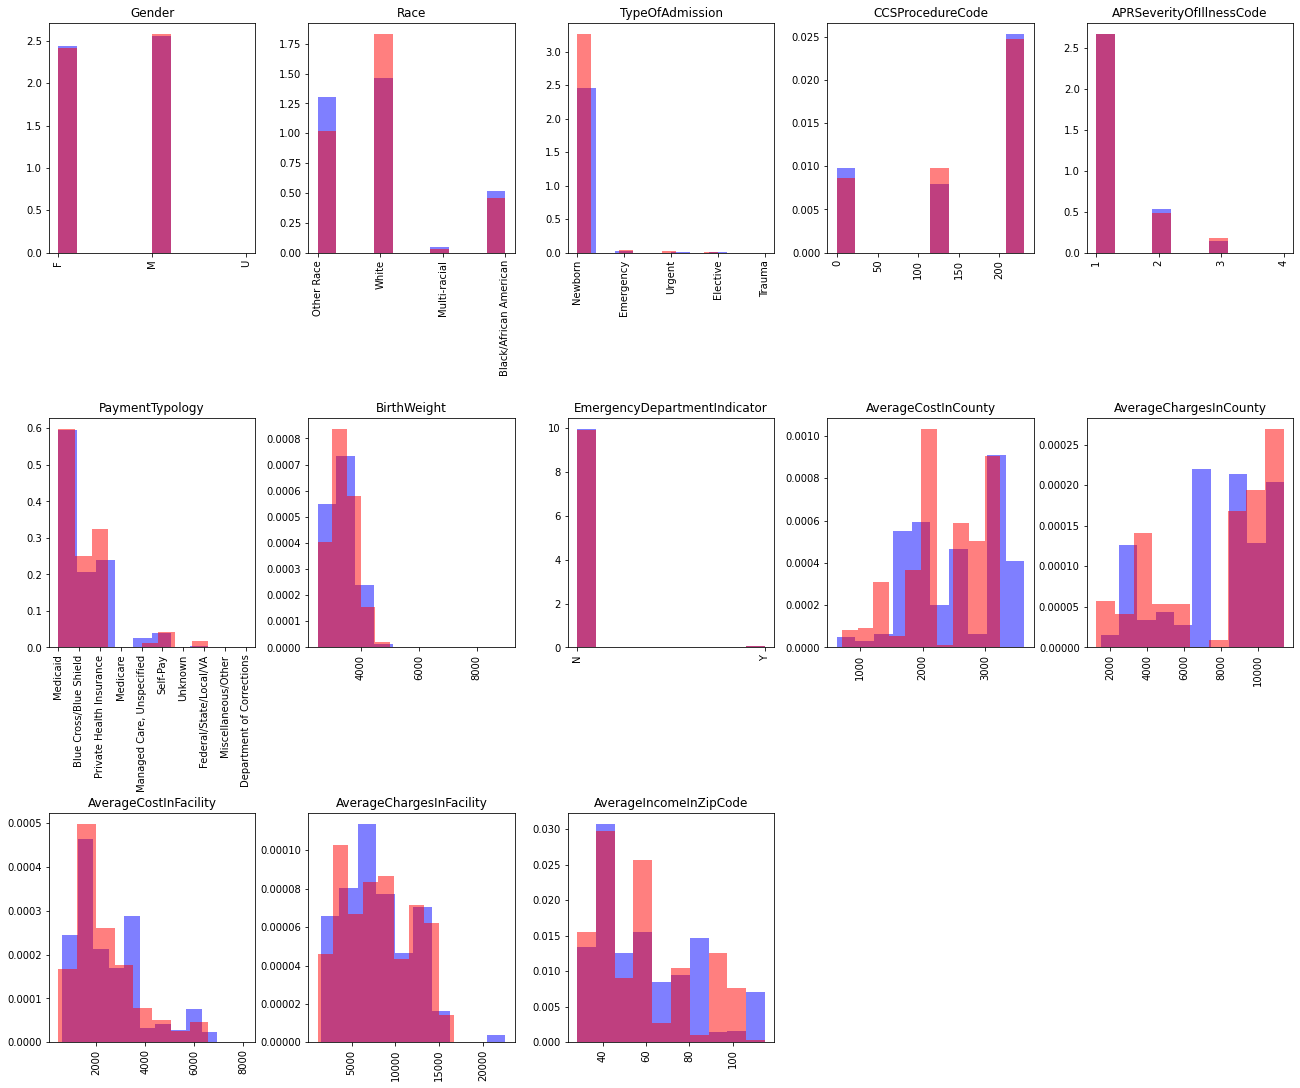

In [66]:
# checking the values stored inside each column for train_data and test_data
fig = plt.figure(figsize=(18, 20))
for i, col in enumerate(train_data.columns):
    if col != "LengthOfStay":
        plt.subplot(4,5,i+1)
        plt.hist(test_data[col], alpha=0.5, color='blue', density=True)
        plt.hist(train_data[col], alpha=0.5, color='red', density=True)
        plt.title(col, size=12)
        plt.xticks(rotation='vertical')
fig.tight_layout(pad=0.5)
plt.show()

<p style="font-size:1.1em;">Both test and train data seems consitant.
<br><br>
<b>5</b>. performing Label Encoding and One Hot Encoding for object type attributes
</p>

In [67]:
diff_value_list = ['TypeOfAdmission','PaymentTypology']
print("Training: ")
for diff_value in diff_value_list:
    print(train_data[diff_value].value_counts())

print("\n\nTesting: ")
for diff_value in diff_value_list:
    print(test_data[diff_value].value_counts())

Training: 
Newborn      58741
Emergency      659
Urgent         412
Elective       154
Name: TypeOfAdmission, dtype: int64
Medicaid                     28723
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                         22
Name: PaymentTypology, dtype: int64


Testing: 
Newborn      68125
Emergency      495
Urgent         362
Elective       194
Trauma           1
Name: TypeOfAdmission, dtype: int64
Medicaid                     37037
Private Health Insurance     14871
Blue Cross/Blue Shield       12795
Self-Pay                      2508
Managed Care, Unspecified     1539
Federal/State/Local/VA         320
Medicare                        43
Miscellaneous/Other             27
Unknown                         25
Department of Corrections       12
Name: PaymentTypology, dtype: int

<p style="font-size:1.1em;">As we can see, for 'TypeOfAdmission' and 'PaymentTypology', test data contains more unique values than train data. So if we use one hot ecoding, training set will have less number of attributes than test set. So, we will use label encoding instead for these paramters. For rest of the paramters as object type, we can use one hot encoding so that all values have equal weight.</p>

In [68]:
label_encoder = preprocessing.LabelEncoder()
train_data[diff_value_list] = train_data[diff_value_list].apply(label_encoder.fit_transform)
train_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,2,228,1,3,3700,N,2611,9227,1751,8951,45,0
1,M,Black/African American,2,228,1,3,2900,N,3242,8966,3338,6409,34,0
2,M,Other Race,2,220,1,6,3200,N,3155,11381,4980,9323,45,0
3,F,Other Race,2,0,1,6,3300,N,3155,11381,5826,15680,59,0
4,F,Other Race,2,228,1,3,2600,N,2611,9227,6000,14344,59,0


In [69]:
test_data[diff_value_list] = test_data[diff_value_list].apply(label_encoder.fit_transform)
test_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,2,216,3,4,4900,N,3242,8966,2448,13196,34
1,F,White,2,220,1,4,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,2,115,1,4,3300,N,3155,11381,1052,11314,74
3,M,Other Race,2,228,1,4,3300,N,2611,9227,3790,6250,45
4,F,Other Race,2,220,2,4,3800,N,3155,11381,3032,10135,59


In [70]:
# one hot encoding for columns with object type
object_cols = ['Gender','Race','EmergencyDepartmentIndicator','CCSProcedureCode','APRSeverityOfIllnessCode']
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
print("New attributes:\n")
for col in object_cols:
    oneHotEncoder.fit(train_data[col].values.reshape(-1, 1))
    encoded = oneHotEncoder.transform(train_data[col].values.reshape(-1, 1)).toarray()
    for i in range(len(oneHotEncoder.categories_[0])):
        print(col + '_' + str(oneHotEncoder.categories_[0][i]))
        train_data[col + '_' + str(oneHotEncoder.categories_[0][i])] = encoded[:,i]


New attributes:

Gender_F
Gender_M
Gender_U
Race_Black/African American
Race_Multi-racial
Race_Other Race
Race_White
EmergencyDepartmentIndicator_N
EmergencyDepartmentIndicator_Y
CCSProcedureCode_-1
CCSProcedureCode_0
CCSProcedureCode_115
CCSProcedureCode_216
CCSProcedureCode_220
CCSProcedureCode_228
CCSProcedureCode_231
APRSeverityOfIllnessCode_1
APRSeverityOfIllnessCode_2
APRSeverityOfIllnessCode_3
APRSeverityOfIllnessCode_4


In [71]:
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
print("New attributes:\n")
for col in object_cols:
    oneHotEncoder.fit(test_data[col].values.reshape(-1, 1))
    encoded = oneHotEncoder.transform(test_data[col].values.reshape(-1, 1)).toarray()    
    for i in range(len(oneHotEncoder.categories_[0])):
        print(col + '_' + str(oneHotEncoder.categories_[0][i]))
        test_data[col + '_' + str(oneHotEncoder.categories_[0][i])] = encoded[:,i]

New attributes:

Gender_F
Gender_M
Gender_U
Race_Black/African American
Race_Multi-racial
Race_Other Race
Race_White
EmergencyDepartmentIndicator_N
EmergencyDepartmentIndicator_Y
CCSProcedureCode_-1
CCSProcedureCode_0
CCSProcedureCode_115
CCSProcedureCode_216
CCSProcedureCode_220
CCSProcedureCode_228
CCSProcedureCode_231
APRSeverityOfIllnessCode_1
APRSeverityOfIllnessCode_2
APRSeverityOfIllnessCode_3
APRSeverityOfIllnessCode_4


In [72]:
# checking the train_data now
train_data.head(4)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,...,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231,APRSeverityOfIllnessCode_1,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4
0,F,Other Race,2,228,1,3,3700,N,2611,9227,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,M,Black/African American,2,228,1,3,2900,N,3242,8966,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,M,Other Race,2,220,1,6,3200,N,3155,11381,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,F,Other Race,2,0,1,6,3300,N,3155,11381,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [73]:
# dropping the original attributes from which we have defined new one using one hot
train_data = train_data.drop(object_cols , axis=1)
test_data = test_data.drop(object_cols , axis=1)

<p style="font-size:1.1em;"><b>6</b>. standard scaling numeric attributes which are inconsistent.</p>

In [74]:
feature_scale_list = ['BirthWeight','AverageCostInCounty','AverageChargesInCounty','AverageCostInFacility','AverageChargesInFacility']
scaler = StandardScaler()
scaler.fit(train_data[feature_scale_list])
train_data[feature_scale_list] = scaler.transform(train_data[feature_scale_list]) 
train_data.head()

,TypeOfAdmission,PaymentTypology,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231,APRSeverityOfIllnessCode_1,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4
0,2,3,0.815033,0.372323,0.387506,-0.516956,0.257181,45,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,3,-0.977721,1.358646,0.306457,0.754179,-0.401494,34,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2,6,-0.305438,1.222655,1.056396,2.069367,0.353572,45,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,6,-0.081344,1.222655,1.056396,2.746985,2.000778,59,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,3,-1.650004,0.372323,0.387506,2.886353,1.654598,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<p style="font-size:1.1em;">Before splitting the data, let's check the shape of both train and test, test should contain 1 attribute less because it doen't have 'LengthOfStay'.</p>

In [75]:
# chekcing shape
print(train_data.shape)
print(test_data.shape)

(59966, 29)
(69177, 28)


<p style="font-size:1.1em;"><b>7</b>. Creating train, test and validation set </p>

In [76]:
test_list = ['LengthOfStay']
y = train_data.loc[:,test_list]
X = train_data.iloc[: , train_data.columns != 'LengthOfStay']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=True, random_state=0)

print("Shape of X_train: ", X_train.shape, ", X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape, ", y_test: ", y_test.shape)
print("Shape of X_val: ", X_val.shape, ", y_val: ", y_val.shape)

Shape of X_train:  (38377, 28) , X_test:  (11994, 28)
Shape of y_train:  (38377, 1) , y_test:  (11994, 1)
Shape of X_val:  (9595, 28) , y_val:  (9595, 1)


<center> <h2 style="color: green;"> <b> Data Modeling </b> </h2> </center>

<br><br>
<p style="font-size:1.1em;"> 
    <b> Applying model:  </b>
    <ol> 
        <li style="font-size:1.1em;"> Logistic Regression</li>
        <li style="font-size:1.1em;"> Logistic Regression with polynomial features </li>
        <li style="font-size:1.1em;"> Decision Tree</li>
        <li style="font-size:1.1em;"> Random Forest </li>
   </ol>         
</p>

In [110]:
def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='micro')
    val_f1 = f1_score(val_y, val_pred, average='micro')
    
    return train_f1, val_f1

<p style="font-size:1.1em;"> <b>1. Logistic Regression</b></p>

In [122]:
# creating a simple one
regressor = LogisticRegression(max_iter=1000)
regressor.fit(X_train, y_train)
train_f1, val_f1 = get_f1_scores(regressor, X_train, y_train, X_val, y_val)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))
print("Test accuracy:", regressor.score(X_test, y_test))
print("Train accuracy:", regressor.score(X_train, y_train))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train F1-Score score: 0.841
Validation F1-Score score: 0.844
Test accuracy: 0.8344172086043021
Train accuracy: 0.8408682283659483


<p style="font-size:1.1em;"> <b>Hyper parameter tuning: </b><br><br>
Let's try tuning the <b>penalty</b> and <b>solver</b> 
</p>

In [127]:
# solver sag and saga are good for large dadaset and support's only penalty l2
regressor = LogisticRegression(max_iter=1000, penalty='l2', solver='saga')
regressor.fit(X_train, y_train)
train_f1, val_f1 = get_f1_scores(regressor, X_train, y_train, X_val, y_val)
print("\n L2: \nTrain F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))
print("Test accuracy:", regressor.score(X_test, y_test))
print("Train accuracy:", regressor.score(X_train, y_train))

# trying penalty l1, saga supports l1
regressor = LogisticRegression(max_iter=1000, penalty='l1', solver='saga')
regressor.fit(X_train, y_train)
train_f1, val_f1 = get_f1_scores(regressor, X_train, y_train, X_val, y_val)
print("\n L1: \nTrain F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))
print("Test accuracy:", regressor.score(X_test, y_test))
print("Train accuracy:", regressor.score(X_train, y_train))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



 L2: 
Train F1-Score score: 0.841
Validation F1-Score score: 0.844
Test accuracy: 0.8345005836251459
Train accuracy: 0.8408161138181723


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



 L1: 
Train F1-Score score: 0.841
Validation F1-Score score: 0.844
Test accuracy: 0.8345005836251459
Train accuracy: 0.8408161138181723


<p style="font-size:1.1em;"> Results are the same, for all combinations </p>

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9943
           1       0.57      0.13      0.21      2051

    accuracy                           0.83     11994
   macro avg       0.71      0.55      0.56     11994
weighted avg       0.80      0.83      0.79     11994



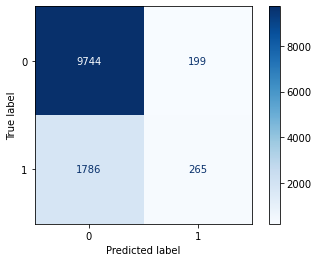

In [128]:
test_pred = regressor.predict(X_test)    
print(classification_report(y_test, test_pred))
disp = plot_confusion_matrix(regressor, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

<p style="font-size:1.1em;"> <b>2. Logistic Regression using polynomial features</b></p>

In [79]:
# poly = PolynomialFeatures(3)
# poly.fit(X_train)
# train_X = poly.transform(X_train)
# test_X = poly.transform(X_test)
# val_X = poly.transform(X_val)

# clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
#                          max_iter=1000, 
#                          class_weight='balanced').fit(train_X, y_train)

# train_f1, val_f1 = get_f1_scores(clf, train_X, y_train, val_X, y_val)
# print("Train F1-Score score: {:.3f}".format(train_f1))
# print("Validation F1-Score score: {:.3f}".format(val_f1))

<p style="font-size:1.1em;">Tried with polynomial feature, but training took more than 10 minuts, had to force stop it.</p>

<p style="font-size:1.1em;"> <b>3. Decision Tree</b></p>

In [83]:
# using a baisc one first, without any parameter
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
train_f1, val_f1 = get_f1_scores(dtree, X_train, y_train, X_val, y_val)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))
print("Test accuracy:", dtree.score(X_test, y_test))
print("Train accuracy:", dtree.score(X_train, y_train))


Train F1-Score score: 0.957
Validation F1-Score score: 0.790
Test accuracy: 0.7848924462231116
Train accuracy: 0.9570836699064544


<p style="font-size:1.1em;"> As we can see from above, there is a large gap between train and validation score. Thus, let's apply hyper parameter tuning. <br><br>
    <b>Hyper parameter tuning </b> <br><br> For tuning, we will take <b>criterion</b> and <b>max_depth</b>    
</p>

In [97]:
gini_list_train = []
gini_list_val = []
entropy_list_train = []
entropy_list_val = []

criterions = ["gini", "entropy"]
max_depths = [3,4,5,6,7,8,9,10,20,30,40]
for criterion in criterions:
    for max_depth in max_depths:
        dtree = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth)
        dtree.fit(X_train,y_train)
        train_f1, val_f1 = get_f1_scores(dtree, X_train, y_train, X_val, y_val)
        if criterion == "gini":
            gini_list_train.append(train_f1)
            gini_list_val.append(val_f1)
        else:
            entropy_list_train.append(train_f1)
            entropy_list_val.append(val_f1)
        

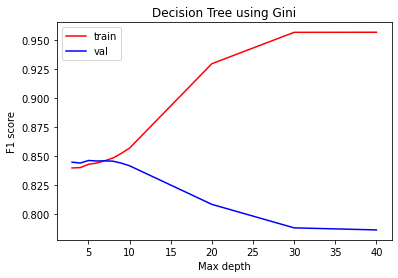

In [102]:
plt.plot(max_depths, gini_list_train, color="r", label="train")
plt.plot(max_depths, gini_list_val, color="b", label="val")
plt.legend()
plt.title("Decision Tree using Gini")
plt.xlabel("Max depth")
plt.ylabel("F1 score")
plt.show()

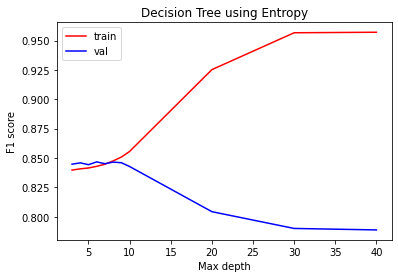

In [103]:
plt.plot(max_depths, entropy_list_train, color="r", label="train")
plt.plot(max_depths, entropy_list_val, color="b", label="val")
plt.legend()
plt.title("Decision Tree using Entropy")
plt.xlabel("Max depth")
plt.ylabel("F1 score")
plt.show()

<p style="font-size:1.1em;">
From both the graphs, we can see that:<br>
1. both criterion gini and entropy gives almost the same results<br>
2. taking depth values higher than 10, decreases the validation score but increases the train accuracy.<br>
</p>
<p style="font-size:1.1em;">So to avoid over training, we will take the max_depth as 6, as for both the grpah, train and validation score seems similar around max_depth 6.<br>
</p>

In [104]:
dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 6)
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
train_f1, val_f1 = get_f1_scores(dtree, X_train, y_train, X_val, y_val)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))
print("Test accuracy:", dtree.score(X_test, y_test))
print("Train accuracy:", dtree.score(X_train, y_train))


Train F1-Score score: 0.843
Validation F1-Score score: 0.847
Test accuracy: 0.8397532099383025
Train accuracy: 0.8429006957292128


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9943
           1       0.58      0.22      0.32      2051

    accuracy                           0.84     11994
   macro avg       0.72      0.59      0.62     11994
weighted avg       0.81      0.84      0.81     11994



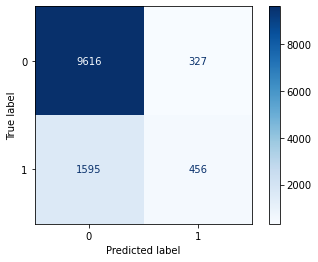

In [109]:
test_pred = dtree.predict(X_test)    
print(classification_report(y_test, test_pred))
disp = plot_confusion_matrix(dtree, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

<p style="font-size:1.1em;"> <b>4. Random Forest</b></p>

In [113]:
# using a baisc one first, without any parameter
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)
pred = randomForest.predict(X_test)
train_f1, val_f1 = get_f1_scores(randomForest, X_train, y_train, X_val, y_val)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))
print("Test accuracy:", randomForest.score(X_test, y_test))
print("Train accuracy:", randomForest.score(X_train, y_train))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train F1-Score score: 0.957
Validation F1-Score score: 0.812
Test accuracy: 0.8115724528931132
Train accuracy: 0.9570576126325664


<p style="font-size:1.1em;"> As we can see from above, there is a large gap between train and validation score. Thus, let's apply hyper parameter tuning. <br><br>
    <b>Hyper parameter tuning </b> <br><br> For tuning, we will use <b>criterion</b> and <b>max_depth</b>
</p>

In [117]:
gini_list_train = []
gini_list_val = []
entropy_list_train = []
entropy_list_val = []

criterions = ["gini", "entropy"]
max_depths = [3,4,5,6,7,8,9,10,20,30,40]
for criterion in criterions:
    for max_depth in max_depths:
        randomForest = RandomForestClassifier(criterion = criterion, max_depth = max_depth)
        randomForest.fit(X_train,y_train)
        train_f1, val_f1 = get_f1_scores(randomForest, X_train, y_train, X_val, y_val)
        if criterion == "gini":
            gini_list_train.append(train_f1)
            gini_list_val.append(val_f1)
        else:
            entropy_list_train.append(train_f1)
            entropy_list_val.append(val_f1)
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

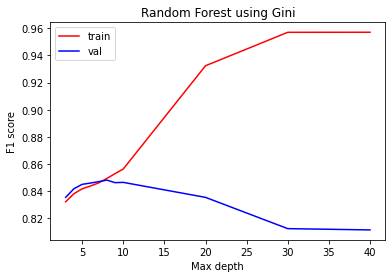

In [118]:
plt.plot(max_depths, gini_list_train, color="r", label="train")
plt.plot(max_depths, gini_list_val, color="b", label="val")
plt.legend()
plt.title("Random Forest using Gini")
plt.xlabel("Max depth")
plt.ylabel("F1 score")
plt.show()

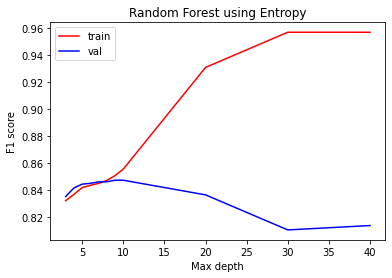

In [119]:
plt.plot(max_depths, entropy_list_train, color="r", label="train")
plt.plot(max_depths, entropy_list_val, color="b", label="val")
plt.legend()
plt.title("Random Forest using Entropy")
plt.xlabel("Max depth")
plt.ylabel("F1 score")
plt.show()

<p style="font-size:1.1em;">
From both the graphs, we can see that:<br>
1. both criterion gini and entropy gives almost the same results<br>
2. taking depth values higher than 10, decreases the validation score but increases the train score.<br>
</p>
<p style="font-size:1.1em;">So to avoid over training, we will take the max_depth as 8, as for both the grpah, train and validation score seems similar around max_depth 8.<br>
</p>

In [120]:
randomForest = RandomForestClassifier(criterion = "gini", max_depth = 8)
randomForest.fit(X_train,y_train)
pred = randomForest.predict(X_test)
train_f1, val_f1 = get_f1_scores(randomForest, X_train, y_train, X_val, y_val)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))
print("Test accuracy:", randomForest.score(X_test, y_test))
print("Train accuracy:", randomForest.score(X_train, y_train))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train F1-Score score: 0.849
Validation F1-Score score: 0.848
Test accuracy: 0.8380023345005836
Train accuracy: 0.8488156969017902


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9943
           1       0.62      0.13      0.22      2051

    accuracy                           0.84     11994
   macro avg       0.73      0.56      0.57     11994
weighted avg       0.81      0.84      0.79     11994



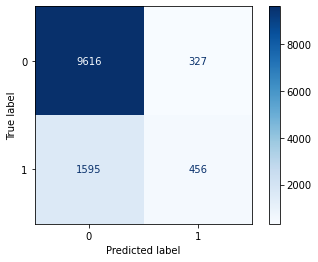

In [121]:
test_pred = randomForest.predict(X_test)    
print(classification_report(y_test, test_pred))
disp = plot_confusion_matrix(dtree, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

<h3> <b> Conclusion </b></h3>

<p style='font-size:1.1em;'>
In the end, i will prefer decision tree as it is much easier to analyze and it is also giving better accuracy when compared with other models. </p><br>

<p style='font-size:1.1em;'>
Limitaions: <br><br>
1. Decision tree can get over trained easily , specifying max depth is one way to avoid it. <br>
2. The dataset is being used to predict patient(new born) discharge time. As we obtained 84% accuracy, it is still not high enough to consider discharging patients solely on its basis. We still require higher accuracy along with more test results to say anything with confidance as it is a sensitive issue. </p><br>

<p style='font-size:1.1em;'>
Improvements:<br><br>
1. The data set should contain more test results, to increase confidence.
2. The data set should contain more details about medical conditions.
3. When the model is deployed, it should be re-trained and tested again and again to match real world scenrios during as real world is dynamic.
</p>

<center> <h2 style="color: green;"> <b> Model prediction </b> </h2> </center>

<h3>Prediction for test data<h3>

In [132]:
dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 6)
dtree.fit(X_train,y_train)
pred = dtree.predict(test_data)

In [142]:
import csv

with open('./s3833321_predictions.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['ID', 'LengthOfStay'])
    
    for i,value in enumerate(pred):
        filewriter.writerow([i+1, value])


<center> <h2 style="color: red;"> <b> Thank you</b> </h2> </center>